In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# comment this out if you want to use GPU
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [26]:
from fame_antenna.phase_space import phasespace
from fame_antenna.utilities import utility_functions, madgraph_utility, plotting
from fame_antenna.data_generation import antenna, model_inputs_cpu, permutations
from fame_antenna.model import antenna_model, base_model, training

# Generate phase-space points (we provide a simple RAMBO)

In [4]:
w = 1000 # sqrt(s)
num_jets = 4 # number of final state jets
train_points = 100000
test_points = 50000
num_points = train_points + test_points # number of phase-space points to generate
y_global_cut = 0.0001 # global phase-space cut
num_cores = 16 # number of cores for parallel clustering of jets

In [5]:
# p = [E, px, py, pz]
# phase-space points have ordering = [p_e-, p_e+, p_q, p_qx, p_g, ...]
X = phasespace.generate_generic(
    num_jets,
    num_points,
    w,
    y_global_cut,
    num_cores
)

Phase-space points:   0%|          | 0/150000 [00:00<?, ?it/s]

######## Finished generating generic phase-space points #########


# Sample renormalisation scale

## In this example we use lhapdf to evaluate $\alpha_{s}$ at these values of $\mu_{R}$

In [6]:
lower_scale = 0.25*w
upper_scale = 4*w
mu_r = np.exp(
    np.random.uniform(
        np.log(lower_scale), np.log(upper_scale),
        num_points
    )
)

In [7]:
import lhapdf
alpha_s_runner = lhapdf.mkAlphaS("NNPDF40_nnlo_as_01180")
alpha_s = np.array([alpha_s_runner.alphasQ(mu) for mu in mu_r])

# Evaluate matrix elements with matrix element generator of your choice

### In this example we will use MadGraph for convenience

In [8]:
me2_mg = madgraph_utility.parallel_get_me_pbar(
    X,
    alpha_s,
    mu_r**2,
    num_cores=16
)

  0%|          | 0/150000 [00:00<?, ?it/s]

 {                                                                                          }
 {                                                                                          }
 {                                      ,,                                                  }
 {       `7MMM.     ,MMF'             `7MM  `7MMF'                                          }
 {         MMMb    dPMM                 MM    MM                                            }
 {         M YM   ,M MM   ,6"Yb.   ,M""bMM    MM         ,pW"Wq.   ,pW"Wq.`7MMpdMAo.        }
 {         M  Mb  M' MM  8)   MM ,AP    MM    MM        6W'   `Wb 6W'   `Wb MM   `Wb        }
 {         M  YM.P'  MM   ,pm9MM 8MI    MM    MM      , 8M     M8 8M     M8 MM    M8        }
 {         M  `YM'   MM  8M   MM `Mb    MM    MM     ,M YA.   ,A9 YA.   ,A9 MM   ,AP        }
 {       .JML. `'  .JMML.`Moo9^Yo.`Wbmd"MML..JMMmmmmMMM  `Ybmd9'   `Ybmd9'  MMbmmd'         }
 {                                                          

 {                                                                                          }
 {                                                                                          }
 {                                      ,,                                                  }
 {       `7MMM.     ,MMF'             `7MM  `7MMF'                                          }
 {         MMMb    dPMM                 MM    MM                                            }
 {         M YM   ,M MM   ,6"Yb.   ,M""bMM    MM         ,pW"Wq.   ,pW"Wq.`7MMpdMAo.        }
 {         M  Mb  M' MM  8)   MM ,AP    MM    MM        6W'   `Wb 6W'   `Wb MM   `Wb        }
 {         M  YM.P'  MM   ,pm9MM 8MI    MM    MM      , 8M     M8 8M     M8 MM    M8        }
 {         M  `YM'   MM  8M   MM `Mb    MM    MM     ,M YA.   ,A9 YA.   ,A9 MM   ,AP        }
 {       .JML. `'  .JMML.`Moo9^Yo.`Wbmd"MML..JMMmmmmMMM  `Ybmd9'   `Ybmd9'  MMbmmd'         }
 {                                                          

########################################################################
  


  +----------------------------------------------------------------+
  |                                                                |
  |  Ninja - version 1.1.0                                         |
  |                                                                |
  |  Author: Tiziano Peraro                                        |
  |                                                                |
  |  Based on:                                                     |
  |                                                                |
  |      P. Mastrolia, E. Mirabella and T. Peraro,                 |
  |      "Integrand reduction of one-loop scattering amplitudes    |
  |      through Laurent series expansion,"                        |
  |      JHEP 1206 (2012) 095  [arXiv:1203.0291 [hep-ph]].         |
  |                                                                |
  |      T. Peraro,      

  |                                                                |
  +----------------------------------------------------------------+


########################################################################
#                                                                      #
#                      You are using OneLOop-3.6                       #
#                                                                      #
# for the evaluation of 1-loop scalar 1-, 2-, 3- and 4-point functions #
#                                                                      #
# author: Andreas van Hameren <hamerenREMOVETHIS@ifj.edu.pl>           #
#   date: 18-02-2015                                                   #
#                                                                      #
# Please cite                                                          #
#    A. van Hameren,                                                   #
#      Comput.Phys.Commun. 182 (2011) 2427-2438, arXiv:10

                                                            
         *******************************************        
         *              C O L L I E R              *        
         *                                         *        
         *        Complex One-Loop Library         *        
         *      In Extended Regularizations        *        
         *                                         *        
         *    by A.Denner, S.Dittmaier, L.Hofer    *        
         *                                         *        
         *              version 1.2.5              *        
         *                                         *        
         *******************************************        
                                                            
                                                            
         *******************************************        
         *              C O L L I E R              *        
         *              

In [9]:
mg_born = np.array([x[0] for x in me2_mg])
mg_loop = np.array([x[1] for x in me2_mg])

# NLO k-factor
Y = mg_loop / mg_born

# Generate model inputs

In [10]:
perms = permutations.getPermutations(num_jets)
A = antenna.Antenna() # antenna functions
M = model_inputs_cpu.Mapper(perms) # mapping variables
AG = model_inputs_cpu.AntennaGenerator(perms, A) # wrapper for antenna function computation
IG = model_inputs_cpu.InputGenerator(AG, M) # wrapper for all model inputs

In [11]:
XR, RF, S = IG.calculate_inputs_array(
    X,
    mu_r,
    alpha_s,
    mode="ratio", # only need to calculate X31/X30, can also use mode="tree" (X30) or "loop" (X31)
    pbar=True
)

  0%|          | 0/150000 [00:00<?, ?it/s]

# Split data into training and testing dataset

In [12]:
X_train, X_test = X[:train_points], X[train_points:]
mu_train, mu_test = mu_r[:train_points], mu_r[train_points:]
alpha_s_train, alpha_s_test = alpha_s[:train_points], alpha_s[train_points:]
XR_train, XR_test = XR[:train_points], XR[train_points:]
RF_train, RF_test = RF[:train_points], RF[train_points:]
S_train, S_test = S[:train_points], S[train_points:]
born_train, born_test = mg_born[:train_points], mg_born[train_points:]
loop_train, loop_test = mg_loop[:train_points], mg_loop[train_points:]
Y_train, Y_test = Y[:train_points], Y[train_points:]

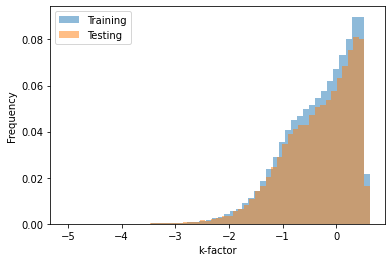

In [13]:
bins = 50
plt.figure()
plt.hist(Y_train, bins, weights=np.ones(train_points) / train_points, alpha=0.5, label='Training')
plt.hist(Y_test, bins, weights=np.ones(test_points) / test_points, alpha=0.5, label='Testing')
plt.legend()
plt.xlabel("k-factor")
plt.ylabel("Frequency")
plt.show()

# Construct neural network model

In [14]:
born_scale = np.percentile(born_train, 0.0)
born_weights = np.log(born_train / born_scale)
loop_scale = np.min(abs(loop_train))
loop_scaled = np.arcsinh(loop_train / loop_scale)

In [15]:
mom_scaler, map_scaler, mu_scaler, sij_scaler, y_scaler, y_scaled, y_scaler_loop, y_loop = training.preprocess_data(X_train, Y_train, mu_train, RF_train, S_train, loop_scaled)

In [16]:
n_antenna = XR_train.shape[1]
n_maps = RF_train.shape[1]
n_s = S_train.shape[1]

In [19]:
naive_model = base_model.build_base_model([mom_scaler, mu_scaler], num_jets)

In [17]:
# model for training as it has inputs only required during training
factorise_model_trainer = antenna_model.build_factorise_model(
    [y_scaler, y_scaler_loop, mom_scaler, map_scaler, mu_scaler, sij_scaler],
    n_antenna, n_maps, n_s, num_jets, loop_scale
)
# will move weights to this model later
factorise_model = antenna_model.build_bare_factorise_model(
    [y_scaler, mom_scaler, map_scaler, mu_scaler, sij_scaler],
    n_antenna, n_maps, n_s, num_jets
)

In [18]:
# model hyperparameters
epochs = 10000
batch_size = 256
lr = 1E-3
min_delta = 1E-6

In [19]:
model_inputs = [
    X_train[:, 2:],
    RF_train,
    np.log(mu_train),
    np.log(S_train),
    XR_train,
    y_scaled,
    born_train,
    born_weights,
    y_loop
]

In [20]:
history = training.train_model(
    factorise_model_trainer,
    model_inputs,
    None,
    checkpoint_path=None,
    epochs=epochs,
    min_delta=min_delta,
    loss=None,
    batch_size=batch_size,
    learning_rate=lr,
    reduce_lr=True
)

Epoch 1/10000
313/313 - 4s - loss: 0.5080 - k: 0.5080 - l: 0.1280 - val_loss: 0.2483 - val_k: 0.2483 - val_l: 0.0547 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 2/10000
313/313 - 3s - loss: 0.2055 - k: 0.2055 - l: 0.0371 - val_loss: 0.1620 - val_k: 0.1620 - val_l: 0.0317 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 3/10000
313/313 - 3s - loss: 0.1323 - k: 0.1323 - l: 0.0216 - val_loss: 0.1216 - val_k: 0.1216 - val_l: 0.0214 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 4/10000
313/313 - 3s - loss: 0.1046 - k: 0.1046 - l: 0.0167 - val_loss: 0.0949 - val_k: 0.0949 - val_l: 0.0141 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 5/10000
313/313 - 3s - loss: 0.0886 - k: 0.0886 - l: 0.0123 - val_loss: 0.0829 - val_k: 0.0829 - val_l: 0.0149 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 6/10000
313/313 - 3s - loss: 0.0759 - k: 0.0759 - l: 0.0105 - val_loss: 0.0723 - val_k: 0.0723 - val_l: 0.0105 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 7/10000
313/313 - 3s - loss: 0.0685 - k: 0.0685 - l: 0.0097 - val_loss: 0.0708 - 

Epoch 55/10000
313/313 - 3s - loss: 0.0276 - k: 0.0276 - l: 0.0034 - val_loss: 0.0262 - val_k: 0.0262 - val_l: 0.0026 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 56/10000
313/313 - 3s - loss: 0.0275 - k: 0.0275 - l: 0.0029 - val_loss: 0.0268 - val_k: 0.0268 - val_l: 0.0045 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 57/10000
313/313 - 3s - loss: 0.0264 - k: 0.0264 - l: 0.0029 - val_loss: 0.0279 - val_k: 0.0279 - val_l: 0.0038 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 58/10000
313/313 - 3s - loss: 0.0277 - k: 0.0277 - l: 0.0035 - val_loss: 0.0252 - val_k: 0.0252 - val_l: 0.0029 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 59/10000
313/313 - 3s - loss: 0.0262 - k: 0.0262 - l: 0.0029 - val_loss: 0.0287 - val_k: 0.0287 - val_l: 0.0038 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 60/10000
313/313 - 3s - loss: 0.0262 - k: 0.0262 - l: 0.0027 - val_loss: 0.0285 - val_k: 0.0285 - val_l: 0.0032 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 61/10000
313/313 - 3s - loss: 0.0261 - k: 0.0261 - l: 0.0033 - val_loss: 0.0

Epoch 109/10000
313/313 - 3s - loss: 0.0227 - k: 0.0227 - l: 0.0023 - val_loss: 0.0302 - val_k: 0.0302 - val_l: 0.0027 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 110/10000
313/313 - 3s - loss: 0.0218 - k: 0.0218 - l: 0.0022 - val_loss: 0.0227 - val_k: 0.0227 - val_l: 0.0023 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 111/10000
313/313 - 3s - loss: 0.0214 - k: 0.0214 - l: 0.0021 - val_loss: 0.0212 - val_k: 0.0212 - val_l: 0.0023 - lr: 0.0010 - 3s/epoch - 11ms/step
Epoch 112/10000
313/313 - 3s - loss: 0.0214 - k: 0.0214 - l: 0.0022 - val_loss: 0.0235 - val_k: 0.0235 - val_l: 0.0026 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 113/10000
313/313 - 3s - loss: 0.0215 - k: 0.0215 - l: 0.0023 - val_loss: 0.0359 - val_k: 0.0359 - val_l: 0.0038 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 114/10000
313/313 - 3s - loss: 0.0210 - k: 0.0210 - l: 0.0021 - val_loss: 0.0282 - val_k: 0.0282 - val_l: 0.0037 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 115/10000
313/313 - 3s - loss: 0.0209 - k: 0.0209 - l: 0.0019 - val_l

Epoch 161/10000
313/313 - 3s - loss: 0.0162 - k: 0.0162 - l: 0.0013 - val_loss: 0.0220 - val_k: 0.0220 - val_l: 0.0013 - lr: 7.0000e-04 - 3s/epoch - 8ms/step
Epoch 162/10000
313/313 - 3s - loss: 0.0166 - k: 0.0166 - l: 0.0015 - val_loss: 0.0182 - val_k: 0.0182 - val_l: 0.0015 - lr: 7.0000e-04 - 3s/epoch - 8ms/step
Epoch 163/10000
313/313 - 3s - loss: 0.0156 - k: 0.0156 - l: 0.0014 - val_loss: 0.0176 - val_k: 0.0176 - val_l: 0.0019 - lr: 7.0000e-04 - 3s/epoch - 8ms/step
Epoch 164/10000
313/313 - 3s - loss: 0.0163 - k: 0.0163 - l: 0.0015 - val_loss: 0.0174 - val_k: 0.0174 - val_l: 0.0017 - lr: 7.0000e-04 - 3s/epoch - 9ms/step
Epoch 165/10000
313/313 - 3s - loss: 0.0158 - k: 0.0158 - l: 0.0015 - val_loss: 0.0174 - val_k: 0.0174 - val_l: 0.0015 - lr: 7.0000e-04 - 3s/epoch - 8ms/step
Epoch 166/10000
313/313 - 3s - loss: 0.0160 - k: 0.0160 - l: 0.0014 - val_loss: 0.0186 - val_k: 0.0186 - val_l: 0.0022 - lr: 7.0000e-04 - 3s/epoch - 8ms/step
Epoch 167/10000
313/313 - 3s - loss: 0.0157 - k: 0.0

Epoch 213/10000
313/313 - 3s - loss: 0.0125 - k: 0.0125 - l: 0.0011 - val_loss: 0.0129 - val_k: 0.0129 - val_l: 9.2539e-04 - lr: 4.9000e-04 - 3s/epoch - 8ms/step
Epoch 214/10000
313/313 - 3s - loss: 0.0128 - k: 0.0128 - l: 0.0012 - val_loss: 0.0155 - val_k: 0.0155 - val_l: 0.0014 - lr: 4.9000e-04 - 3s/epoch - 8ms/step
Epoch 215/10000
313/313 - 3s - loss: 0.0126 - k: 0.0126 - l: 0.0012 - val_loss: 0.0148 - val_k: 0.0148 - val_l: 0.0012 - lr: 4.9000e-04 - 3s/epoch - 8ms/step
Epoch 216/10000
313/313 - 3s - loss: 0.0134 - k: 0.0134 - l: 0.0011 - val_loss: 0.0129 - val_k: 0.0129 - val_l: 0.0014 - lr: 4.9000e-04 - 3s/epoch - 9ms/step
Epoch 217/10000
313/313 - 3s - loss: 0.0129 - k: 0.0129 - l: 0.0012 - val_loss: 0.0128 - val_k: 0.0128 - val_l: 0.0011 - lr: 4.9000e-04 - 3s/epoch - 9ms/step
Epoch 218/10000
313/313 - 3s - loss: 0.0128 - k: 0.0128 - l: 0.0010 - val_loss: 0.0142 - val_k: 0.0142 - val_l: 0.0011 - lr: 4.9000e-04 - 3s/epoch - 8ms/step
Epoch 219/10000
313/313 - 3s - loss: 0.0127 - k:

Epoch 264/10000
313/313 - 3s - loss: 0.0112 - k: 0.0112 - l: 0.0010 - val_loss: 0.0117 - val_k: 0.0117 - val_l: 0.0011 - lr: 3.4300e-04 - 3s/epoch - 9ms/step
Epoch 265/10000
313/313 - 3s - loss: 0.0110 - k: 0.0110 - l: 8.7731e-04 - val_loss: 0.0125 - val_k: 0.0125 - val_l: 6.9310e-04 - lr: 3.4300e-04 - 3s/epoch - 8ms/step
Epoch 266/10000
313/313 - 3s - loss: 0.0109 - k: 0.0109 - l: 0.0011 - val_loss: 0.0124 - val_k: 0.0124 - val_l: 0.0012 - lr: 3.4300e-04 - 3s/epoch - 8ms/step
Epoch 267/10000

Epoch 267: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
313/313 - 3s - loss: 0.0108 - k: 0.0108 - l: 0.0010 - val_loss: 0.0119 - val_k: 0.0119 - val_l: 8.3332e-04 - lr: 3.4300e-04 - 3s/epoch - 8ms/step
Epoch 268/10000
313/313 - 3s - loss: 0.0098 - k: 0.0098 - l: 7.3573e-04 - val_loss: 0.0111 - val_k: 0.0111 - val_l: 7.1903e-04 - lr: 2.4010e-04 - 3s/epoch - 9ms/step
Epoch 269/10000
313/313 - 3s - loss: 0.0098 - k: 0.0098 - l: 8.3619e-04 - val_loss: 0.0117 - val_k: 0.0117 - v

Epoch 313/10000
313/313 - 3s - loss: 0.0084 - k: 0.0084 - l: 7.8441e-04 - val_loss: 0.0095 - val_k: 0.0095 - val_l: 7.8278e-04 - lr: 1.1765e-04 - 3s/epoch - 8ms/step
Epoch 314/10000
313/313 - 3s - loss: 0.0084 - k: 0.0084 - l: 7.5793e-04 - val_loss: 0.0097 - val_k: 0.0097 - val_l: 6.1548e-04 - lr: 1.1765e-04 - 3s/epoch - 8ms/step
Epoch 315/10000
313/313 - 3s - loss: 0.0085 - k: 0.0085 - l: 7.3733e-04 - val_loss: 0.0099 - val_k: 0.0099 - val_l: 7.6250e-04 - lr: 1.1765e-04 - 3s/epoch - 8ms/step
Epoch 316/10000
313/313 - 3s - loss: 0.0085 - k: 0.0085 - l: 7.0068e-04 - val_loss: 0.0095 - val_k: 0.0095 - val_l: 7.5290e-04 - lr: 1.1765e-04 - 3s/epoch - 8ms/step
Epoch 317/10000
313/313 - 3s - loss: 0.0084 - k: 0.0084 - l: 6.4777e-04 - val_loss: 0.0096 - val_k: 0.0096 - val_l: 7.0322e-04 - lr: 1.1765e-04 - 3s/epoch - 8ms/step
Epoch 318/10000
313/313 - 3s - loss: 0.0084 - k: 0.0084 - l: 7.5774e-04 - val_loss: 0.0098 - val_k: 0.0098 - val_l: 8.1400e-04 - lr: 1.1765e-04 - 3s/epoch - 8ms/step
Epoc

Epoch 362/10000
313/313 - 3s - loss: 0.0080 - k: 0.0080 - l: 7.7417e-04 - val_loss: 0.0091 - val_k: 0.0091 - val_l: 6.4029e-04 - lr: 8.2354e-05 - 3s/epoch - 8ms/step
Epoch 363/10000
313/313 - 3s - loss: 0.0079 - k: 0.0079 - l: 7.9544e-04 - val_loss: 0.0090 - val_k: 0.0090 - val_l: 6.5362e-04 - lr: 8.2354e-05 - 3s/epoch - 8ms/step
Epoch 364/10000
313/313 - 3s - loss: 0.0080 - k: 0.0080 - l: 7.1151e-04 - val_loss: 0.0092 - val_k: 0.0092 - val_l: 7.5887e-04 - lr: 8.2354e-05 - 3s/epoch - 8ms/step
Epoch 365/10000
313/313 - 3s - loss: 0.0079 - k: 0.0079 - l: 7.4773e-04 - val_loss: 0.0091 - val_k: 0.0091 - val_l: 7.3316e-04 - lr: 8.2354e-05 - 3s/epoch - 8ms/step
Epoch 366/10000
313/313 - 3s - loss: 0.0079 - k: 0.0079 - l: 7.7778e-04 - val_loss: 0.0090 - val_k: 0.0090 - val_l: 6.3370e-04 - lr: 8.2354e-05 - 3s/epoch - 8ms/step
Epoch 367/10000

Epoch 367: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
313/313 - 3s - loss: 0.0079 - k: 0.0079 - l: 7.4918e-04 - val_loss: 0.0099 -

Epoch 410/10000
313/313 - 3s - loss: 0.0073 - k: 0.0073 - l: 7.0027e-04 - val_loss: 0.0086 - val_k: 0.0086 - val_l: 6.1792e-04 - lr: 2.8248e-05 - 3s/epoch - 8ms/step
Epoch 411/10000
313/313 - 3s - loss: 0.0073 - k: 0.0073 - l: 6.7056e-04 - val_loss: 0.0088 - val_k: 0.0088 - val_l: 5.2157e-04 - lr: 2.8248e-05 - 3s/epoch - 8ms/step
Epoch 412/10000
313/313 - 3s - loss: 0.0073 - k: 0.0073 - l: 6.0650e-04 - val_loss: 0.0087 - val_k: 0.0087 - val_l: 6.7343e-04 - lr: 2.8248e-05 - 3s/epoch - 8ms/step
Epoch 413/10000
313/313 - 3s - loss: 0.0073 - k: 0.0073 - l: 7.1002e-04 - val_loss: 0.0085 - val_k: 0.0085 - val_l: 6.4755e-04 - lr: 2.8248e-05 - 3s/epoch - 8ms/step
Epoch 414/10000
313/313 - 3s - loss: 0.0073 - k: 0.0073 - l: 6.4736e-04 - val_loss: 0.0085 - val_k: 0.0085 - val_l: 6.5363e-04 - lr: 2.8248e-05 - 3s/epoch - 8ms/step
Epoch 415/10000
313/313 - 3s - loss: 0.0073 - k: 0.0073 - l: 7.1063e-04 - val_loss: 0.0087 - val_k: 0.0087 - val_l: 6.2559e-04 - lr: 2.8248e-05 - 3s/epoch - 8ms/step
Epoc

Epoch 459/10000
313/313 - 3s - loss: 0.0071 - k: 0.0071 - l: 6.5618e-04 - val_loss: 0.0085 - val_k: 0.0085 - val_l: 6.2754e-04 - lr: 1.3841e-05 - 3s/epoch - 8ms/step
Epoch 460/10000
313/313 - 3s - loss: 0.0071 - k: 0.0071 - l: 6.5945e-04 - val_loss: 0.0085 - val_k: 0.0085 - val_l: 6.3878e-04 - lr: 1.3841e-05 - 3s/epoch - 8ms/step
Epoch 461/10000
313/313 - 3s - loss: 0.0071 - k: 0.0071 - l: 6.3068e-04 - val_loss: 0.0084 - val_k: 0.0084 - val_l: 6.5857e-04 - lr: 1.3841e-05 - 3s/epoch - 8ms/step
Epoch 462/10000
313/313 - 3s - loss: 0.0071 - k: 0.0071 - l: 6.8869e-04 - val_loss: 0.0085 - val_k: 0.0085 - val_l: 5.5159e-04 - lr: 1.3841e-05 - 3s/epoch - 8ms/step
Epoch 463/10000
313/313 - 3s - loss: 0.0071 - k: 0.0071 - l: 6.4378e-04 - val_loss: 0.0086 - val_k: 0.0086 - val_l: 5.7251e-04 - lr: 1.3841e-05 - 3s/epoch - 8ms/step
Epoch 464/10000
313/313 - 3s - loss: 0.0071 - k: 0.0071 - l: 6.3559e-04 - val_loss: 0.0084 - val_k: 0.0084 - val_l: 6.3223e-04 - lr: 1.3841e-05 - 3s/epoch - 8ms/step
Epoc

Epoch 508/10000
313/313 - 3s - loss: 0.0070 - k: 0.0070 - l: 6.5491e-04 - val_loss: 0.0084 - val_k: 0.0084 - val_l: 6.3717e-04 - lr: 6.7822e-06 - 3s/epoch - 8ms/step
Epoch 509/10000
313/313 - 3s - loss: 0.0070 - k: 0.0070 - l: 6.5718e-04 - val_loss: 0.0084 - val_k: 0.0084 - val_l: 6.1002e-04 - lr: 6.7822e-06 - 3s/epoch - 8ms/step
Epoch 510/10000
313/313 - 3s - loss: 0.0070 - k: 0.0070 - l: 6.5821e-04 - val_loss: 0.0084 - val_k: 0.0084 - val_l: 6.6574e-04 - lr: 6.7822e-06 - 3s/epoch - 8ms/step
Epoch 511/10000
Restoring model weights from the end of the best epoch: 411.

Epoch 511: ReduceLROnPlateau reducing learning rate to 4.747560842588427e-06.
313/313 - 3s - loss: 0.0070 - k: 0.0070 - l: 6.8573e-04 - val_loss: 0.0084 - val_k: 0.0084 - val_l: 5.7868e-04 - lr: 6.7822e-06 - 3s/epoch - 8ms/step
Epoch 511: early stopping


# Transfer weights and make predictions

In [21]:
trained_weights = factorise_model_trainer.get_weights()
factorise_model.set_weights(trained_weights[:20])

In [25]:
C = factorise_model.predict(
    [X_test[:, 2:], RF_test, np.log(mu_test), np.log(S_test)],
    verbose=1,
    batch_size=2**17
)
y_preds = C[:, 0] + np.sum(C[:, 1:]*XR_test, axis=1)

1/1 [==============================] - 0s 41ms/step


## In this quickstart we use TF for predictions as it is straightforward. For use with onnx runtime, use the Python package tf2onnx to convert these TF models.

# Compare to MadGraph values

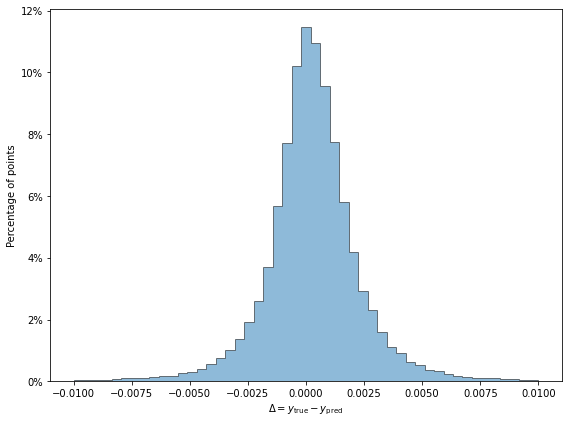

In [29]:
plotting.ratio_plot(Y_test, y_preds, bins=np.linspace(-0.01, 0.01, 50));

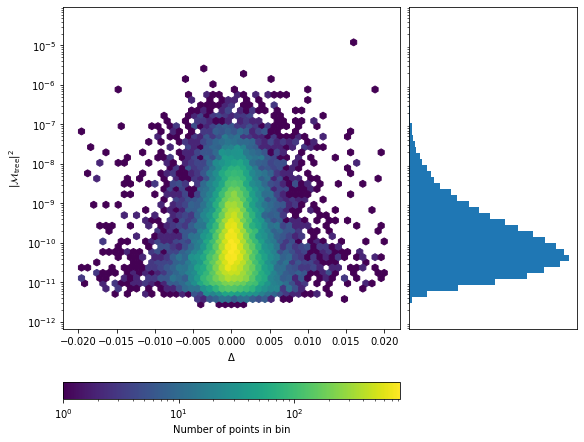

In [32]:
plotting.hexplot(Y_test, born_test, y_preds, x_lims=[-0.02, 0.02]);